In [25]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import cv2

In [26]:
# Step 1: Load and Explore the Dataset
# Load the CSV file
csv_path = "C:\\Users\\pc\\Downloads\\archive (2)\\english.csv"
data = pd.read_csv(csv_path)

# Check the data
print(data.head())


                image label
0  Img/img001-001.png     0
1  Img/img001-002.png     0
2  Img/img001-003.png     0
3  Img/img001-004.png     0
4  Img/img001-005.png     0


In [27]:
import os
import cv2
import numpy as np
from sklearn.preprocessing import LabelBinarizer

image_dir = 'C:\\Users\\pc\\Downloads\\archive (2)\\Img'
images = []
labels = []

for index, row in data.iterrows():
    # Fix path to handle the duplicate "Img" issue
    if row['image'].startswith('Img/'):
        img_path = os.path.join('C:\\Users\\pc\\Downloads\\archive (2)', row['image'])
    else:
        img_path = os.path.join(image_dir, row['image'])
    


    # Check if the file exists
    if not os.path.exists(img_path):
        print(f"File not found: {img_path}")
        continue

    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        print(f"Failed to read image: {img_path}")
        continue

    try:
        img = cv2.resize(img, (28, 28))
        img = img / 255.0
        images.append(img)
        labels.append(row['label'])
    except Exception as e:
        print(f"Error processing image {img_path}: {e}")
        continue


# Convert to numpy arrays
images = np.array(images).reshape(-1, 28, 28, 1)
labels = np.array(labels)
print(f"Images shape: {images.shape}")
print(f"Labels shape: {labels.shape}")

# Encode labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

Images shape: (3410, 28, 28, 1)
Labels shape: (3410,)


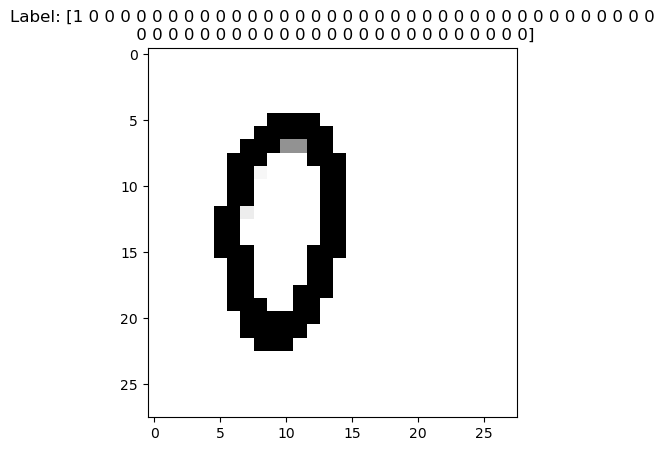

In [28]:
import matplotlib.pyplot as plt

plt.imshow(images[0].reshape(28, 28), cmap='gray')
plt.title(f"Label: {labels[0]}")
plt.show()

In [29]:
X_train, X_test , y_train , y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

In [30]:
# Step 4: Build the CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(62, activation='softmax')  # 62 classes for 0-9, A-Z, a-z
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [31]:
# Step 5: Train the Model
history = model.fit(X_train, y_train, epochs=10, validation_split=0.2, batch_size=32)


Epoch 1/10
69/69 [==============================] - 2s 18ms/step - loss: 4.1279 - accuracy: 0.0206 - val_loss: 4.1105 - val_accuracy: 0.0256
Epoch 2/10
69/69 [==============================] - 1s 12ms/step - loss: 4.0417 - accuracy: 0.0390 - val_loss: 3.9082 - val_accuracy: 0.0623
Epoch 3/10
69/69 [==============================] - 1s 12ms/step - loss: 3.6868 - accuracy: 0.1013 - val_loss: 3.3992 - val_accuracy: 0.1905
Epoch 4/10
69/69 [==============================] - 1s 13ms/step - loss: 3.2021 - accuracy: 0.1833 - val_loss: 2.8209 - val_accuracy: 0.3004
Epoch 5/10
69/69 [==============================] - 1s 14ms/step - loss: 2.7799 - accuracy: 0.2640 - val_loss: 2.4093 - val_accuracy: 0.4048
Epoch 6/10
69/69 [==============================] - 1s 12ms/step - loss: 2.4282 - accuracy: 0.3382 - val_loss: 2.0804 - val_accuracy: 0.4744
Epoch 7/10
69/69 [==============================] - 1s 12ms/step - loss: 2.1610 - accuracy: 0.3969 - val_loss: 1.8603 - val_accuracy: 0.5275
Epoch 8/10
69

22/22 [==============================] - 0s 11ms/step - loss: 1.5211 - accuracy: 0.5850
Test accuracy: 0.5850439667701721


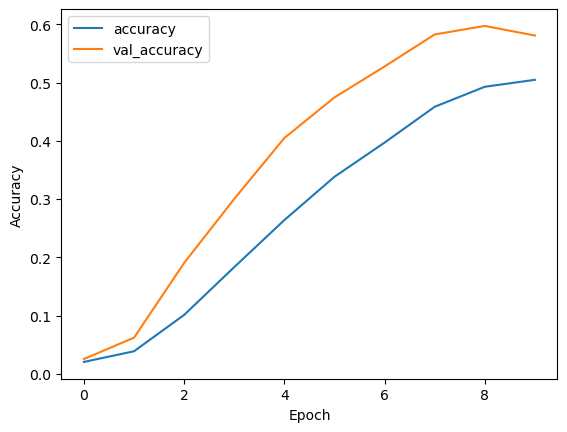

In [32]:
# Step 6: Evaluate the Model
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc}')

# Optional: Plot training history
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [33]:
print(os.path.abspath("HandWritten.ipynb"))  # Replace with your notebook's filename


C:\Users\pc\HandWritten.ipynb
